# 은행 등급 평가

- 평가 목적
    - 1금융권과 2금융권의 안정성 비교를 위함
    - 등급이 높은 2금융권 확인 후 추천 가능
    - 소비자들이 2금융권도 안심하고 사용할 수 있는 기준 선정




- 기준 자료
    - 금융소비자연맹의 순위 기준
    - 은행순위
        - http://kfco.org/consumer/bankRanking.asp?board_id=bankRanking
    - 저축은행 순위
         - http://kfco.org/consumer/etc.asp?board_id=etc




# 계산 시 고려사항

- 각 지표가 다른 은행과 저축은행을 통합 점수 필요.
    - 기준 자료 : 은행과 저축은행은 서로 다른 기준을 가지고 있어서 비교 할 수 없음.

- 기준 자료 속 연도별 비율과 평가 기준이 다름


# 평가 지표

- 금융소비자연맹 평가 기준 활용



## 은행

- 각 항목별 순위를 나열 후 평균 점수와 가장 가까운 값을 80 점으로 함.
- 단계별 +5 , -5 점수를 부여함
- 각 항목별 가중치 점수를 준 후 가중치를 주어 합산한 점수를 통해 총 은행 순위를 결정함

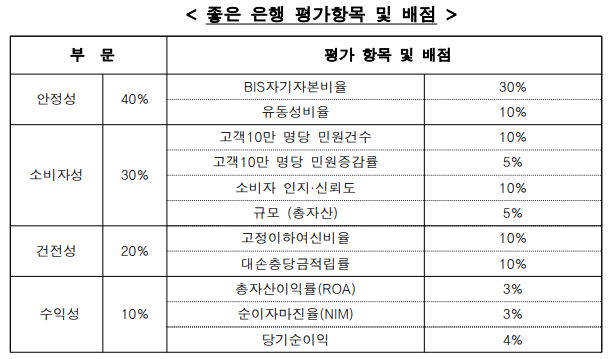

- 평가 항목
    - BIS 자기자본 비율
        - 은행의 리스크 증대에 대처하기 위한 자기자본 비율
        -   (기본자본 + 보완자본 - 공제항목)/위험가중자산 *100
    - 유동성 비율(유동성 커버리지 비율)
        - 단기 유동성커버리지 비율 (LCR) 은 30일간 잠재적 유동성 위기 상황에 대처할 수 있도록 제약 조건 없이 활용 가능한 고유동성 자산 보유 비율
    - 고정이하여신비율
        - 총 여신 중 고정 이하 여신이 차지하는 비율
        - 자산 건전성 분류 기준에 따라 여신 분류 결과 고정, 회수의문, 추정손실의 합계액의 비율
    - 대손충당금 적립률
        - 대출한 자금 중 회수가 안될 부분을 사전에 예측하고 대출 금액의 일정 비율을 지축한 자금
    - ROA(총자산이익률)
        - 당기순이익을 총자산으로 나누어 얻어지는 수치
        - 총 자산을 얼마나 효율적으로 운용했는지를 나타냄
    - 순이자마진율(NIM)
        - 금리부자산의 운용결과로 발생한 은행의 운용자금 한 단위당 이자 순수익을 나타내는 개념
    - 당기순이익
        - 일정기간의 순이익
        - 원가, 판매비, 관리비 등 빠고 결정한 순이익

## 저축은행

- 소비자성은 통계 자료 부족으로 평가항목에서 제외시킴

### 2015, 2017 기준

- 2015년도 : 평균 65점, 등급별 +- 1
- 2017년도 : 평균 80점

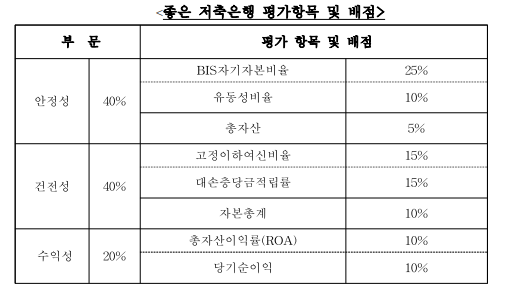

### 2019, 2020 기준

- 평균 80점
- 안전성 비율이 10% 상승 , 건전성 비율 10% 감소
    - 저축은행의 안전성 기준이 더 중요한 값으로 상승함

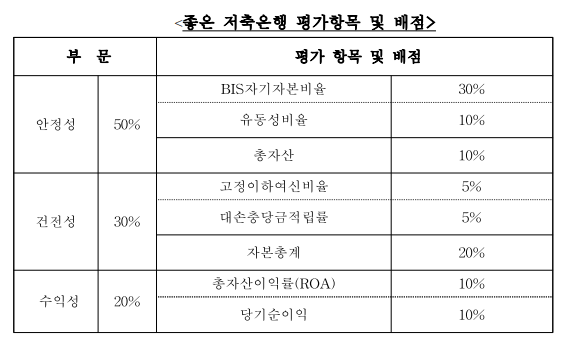

- 평가 항목
    - 유동성 비율 : 예금 인출요구에 대응하는 지급 능력
        - 저축은행은 유동성 커버리지 비율이 아닌 유동성 비율로 확인
    - 나머지 항목은 은행의 개념과 동일

# 기준

- 1금융권 은행의 50%가(10개) 점수 상위 20%에 포함되어 있어야 함.
<br/>
    -> 이유는? : 작성해야합니다
- 소비자성은 데이터 수집 부족으로 인해 평가 항목에서 제외


# 모듈

In [ ]:
# # 나눔 글꼴 설치
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [ ]:
# 분석
import pandas as pd
import numpy as np

# 시각화
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns
plt.rc('font', family='NanumBarunGothic')

# 데이터

## 데이터 출처

- 핵심 경영 지표
    - 금융 소비자 정보 포털 파인
    - 은행 : https://fine.fss.or.kr/fine/fncco/coreMngmt/fisisBank.do?menuNo=900048
    - 저축은행 : https://fine.fss.or.kr/fine/fncco/coreMngmt/fisisSavingbank.do?menuNo=900052

- 나머지 지표
    - 금융통계정보시스템
        - https://fisis.fss.or.kr/fss/fsiview/indexw.html
        - 유동성 커버리지 비율
        - 대손충당금
        - 유동성 비율

- 유형 수
    - 은행 : 19개
    - 저축은행 : 79개
    - 총 : 98개

## 데이터 로드

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ASAC/final/data/금융감독원데이터/경영지표.csv", encoding = "euc-kr",index_col = 0)

In [ ]:
df.head(2)

,구분,총자산,총부채,자기자본,당기순이익,BIS비율,여신비율,ROA,NIM,유형,유동성커버리지비율,대손충당금적립비율(고정이하여신대비)_은행,유동성비율,대손충당금적립비율(고정이하여신대비)_저축
0,경남은행,49459933,45969835,3490097,179759,14.63,0.37,0.60,1.90,은행,130.71,228.45,NaN,NaN
1,광주은행,28586391,26404717,2181674,153747,15.69,0.45,0.88,2.89,은행,106.41,180.26,NaN,NaN


In [ ]:
df_bank = df[df['유형'] == "은행"]
df_bank =  df_bank.drop(columns = ['유동성비율', '대손충당금적립비율(고정이하여신대비)_저축'])
df_saving_bank = df[df['유형'] == '저축은행']
df_saving_bank =  df_saving_bank.drop(columns = ['유동성커버리지비율', '대손충당금적립비율(고정이하여신대비)_은행'])

# 계산 함수

- df : 원본값이 들어가있는 df
- mean_num : 평균 점수
- range : 등급별 점수 (+ ,-)
- col_name : 계산하고 싶은 열 이름
- ascending : 오름차순, 내림차순
    - True: 오름차순
    - False : 내림차순
- join_df : 새롭게 join될 df
-  return 값 : join_df

In [ ]:
def grade_cal(df, mean_num , range, col_name , ascending , join_df ):
    # tmp_df : 항목 정렬 df
    tmp_df = df[['구분',col_name]].sort_values(by = col_name, ascending=ascending).reset_index(drop = True )
    tmp_df = tmp_df.reset_index()

    # 항목 평균 계산
    mean_ = np.mean(df[col_name])
    tmp_list = df[col_name].values

    # 평균과 가장 가까운 값 찾기
    mean_in_list = tmp_list[np.abs(tmp_list - mean_).argmin()]
    mean_idx_list = tmp_df[tmp_df[col_name] ==mean_in_list]['index']
    max_ = max(mean_idx_list)
    min_ = min(mean_idx_list)

    # 평균과 가까운 값이 여러개 일때 처리 함수
    def mean_max(max_, min_,mean_num, range,  x):
        if max_ == min_:
            return mean_num + (min_ - x) *range
        elif min_ <= x and max_ >= x:
            return mean_num
        elif min_ > x:
            return mean_num + (min_ - x) *range
        elif max_ < x:
            return mean_num + (max_ - x) *range

    # 계산된 등급들을 join 후 return
    tmp_col = col_name + "_등급"
    tmp_df[tmp_col]  = tmp_df['index'].apply(lambda x : mean_max(max_, min_,mean_num, range,  x))
    join_df = pd.merge(join_df,tmp_df[['구분',tmp_col]], how = 'left', on = '구분')
    return join_df

# 계산 과정

## 가설

1. 각 지표로 계산 후 통합 ,  점수별 순위
2. 한개의 기준 비율 적용 후 점수별 순위
3. 각 지표들을 모두 통합 후 순위 계산









## 1) 각 지표로 계산 후 통합 ,  점수별 순위


- 각 계산에 따른 평균 점수 선정이 중요
- 각각의 가중치를 적용
- 은행의 경우 소비자성의 비율을 각 항목 비율에 맞게 추가해서 계산해줌.
    - ex) BIS : 30% -> 37.5%
- 은행은 평균을 80점, 등급별 +,- 5 로 고정 후 계산 (공시된 자료, 연도별 변화 없음)


> 1 - 1 저축은행 평균 80점, 등급별 +, - 1


> 1 - 2 저축은행 평균 65점, 등급별 +, - 1

**계산 지표 비율 **

- 은행 (저축 은행 비율과 동일하게 적용)
    - 안정성(50%)
        - BIS 자기자본비율(37.5%)
        - 유동성 커버리지 비율(12.5%)
    - 건전성(30%)
        - 고정이하 여신비율(15%)
        - 대손충당금적립률(총여신대비)(15%)
    - 수익성(20%)
        - ROA (6%)
        - MIN(6%)
        - 당기순이익(8%)

- 저축은행은 위 지표(2019, 2020 년도와 동일)

### 1 - 1  저축은행 평균 80점, 등급별 +, - 1

- 계산 결과 ( 상위 20%의 은행, 저축은행 비율)
    - 은행 6
    - 저축은행 14

In [ ]:
saving = df_saving_bank[['구분', '유형']]
bank = df_bank[['구분', '유형']]

In [ ]:
# 안정성

# 저축은행
saving = grade_cal(df = df_saving_bank,mean_num = 80 , range = 1, col_name = 'BIS비율', ascending = False, join_df  =  saving)
saving = grade_cal(df = df_saving_bank ,mean_num = 80 , range = 1, col_name = '유동성비율' , ascending = False, join_df  =  saving)
saving = grade_cal(df = df_saving_bank ,mean_num = 80 , range = 1, col_name = '총자산' , ascending = False, join_df  =  saving)
saving['안정성'] = saving['BIS비율_등급']*0.3 + saving['유동성비율_등급']*0.1 + saving['총자산_등급']*0.1

# 은행
bank = grade_cal(df = df_bank,mean_num = 80 , range = 5, col_name = 'BIS비율' , ascending = False, join_df  =  bank)
bank = grade_cal(df = df_bank,mean_num = 80 , range = 5, col_name = '유동성커버리지비율' , ascending = False, join_df  =  bank)
bank = grade_cal(df = df_bank,mean_num = 80 , range = 5, col_name = '총자산' , ascending = False, join_df  =  bank)
bank['안정성'] = bank['BIS비율_등급']*0.375 + bank['유동성커버리지비율_등급']*0.125

In [ ]:
# 건전성

# 저축은행
saving = grade_cal(df = df_saving_bank,mean_num = 80 , range = 1, col_name = '여신비율', ascending = True, join_df  =  saving)
saving = grade_cal(df = df_saving_bank ,mean_num = 80 , range = 1, col_name = '대손충당금적립비율(고정이하여신대비)_저축' , ascending = False, join_df  =  saving)
saving = grade_cal(df = df_saving_bank ,mean_num = 80 , range = 1, col_name = '자기자본' , ascending = False, join_df  =  saving)
saving['건전성'] = saving['여신비율_등급']*0.05 + saving['대손충당금적립비율(고정이하여신대비)_저축_등급']*0.05 + saving['자기자본_등급']*0.2

# 은행
bank = grade_cal(df = df_bank,mean_num = 80 , range = 5, col_name = '여신비율' , ascending = True, join_df  =  bank)
bank = grade_cal(df = df_bank,mean_num = 80 , range = 5, col_name = '대손충당금적립비율(고정이하여신대비)_은행' , ascending = False, join_df  =  bank)
bank['건전성'] = bank['여신비율_등급']*0.15 + bank['대손충당금적립비율(고정이하여신대비)_은행_등급']*0.15

In [ ]:
# 수익성

# 저축은행
saving = grade_cal(df = df_saving_bank,mean_num = 80 , range = 1, col_name = 'ROA', ascending = False, join_df  =  saving)
saving = grade_cal(df = df_saving_bank ,mean_num = 80 , range = 1, col_name = '당기순이익' , ascending = False, join_df  =  saving)
saving['수익성'] = saving['ROA_등급']*0.1 + saving['당기순이익_등급']*0.1

# 은행
bank = grade_cal(df = df_bank,mean_num = 80 , range = 5, col_name = 'ROA' , ascending = False, join_df  =  bank)
bank = grade_cal(df = df_bank,mean_num = 80 , range = 5, col_name = '당기순이익' , ascending = False, join_df  =  bank)
bank = grade_cal(df = df_bank,mean_num = 80 , range = 5, col_name = 'NIM' , ascending = False, join_df  =  bank)
bank['수익성'] = bank['ROA_등급']*0.06 + bank['당기순이익_등급']*0.08+ bank['NIM_등급']*0.06

In [ ]:
df_80 =  pd.concat([bank[['구분','유형','안정성','건전성','수익성']],saving[['구분','유형','안정성','건전성','수익성']] ])

In [ ]:
df_80['총합계'] = df_80['안정성'] + df_80['건전성'] + df_80['수익성']

In [ ]:
df_80 = df_80.sort_values(by = "총합계", ascending = False)
tmp_ = df_80.head(20)

In [ ]:
tmp_

,구분,유형,안정성,건전성,수익성,총합계
11,주식회사 카카오뱅크,은행,53.125,29.25,17.4,99.775
5,남양저축은행,저축은행,45.200,26.65,26.9,98.750
3,농협은행주식회사,은행,40.625,36.75,16.8,94.175
75,한국투자저축은행,저축은행,41.700,28.55,20.8,91.050
23,민국저축은행,저축은행,44.200,24.00,22.5,90.700
25,부림저축은행,저축은행,45.900,22.45,22.3,90.650
4,금화저축은행,저축은행,44.000,20.55,25.6,90.150
37,신한저축은행,저축은행,36.000,28.75,25.1,89.850
73,푸른상호저축은행,저축은행,41.000,25.90,22.9,89.800
57,유안타저축은행,저축은행,45.400,25.85,17.5,88.750


In [ ]:
tmp_['유형'].value_counts()

저축은행    14
은행       6
Name: 유형, dtype: int64

### 1 - 2 저축은행 평균 65점, 등급별 +, - 1

- 계산 결과( 상위 20%)
    - 은행 : 10개
    - 저축은행 : 10개

In [ ]:
saving = df_saving_bank[['구분', '유형']]
bank = df_bank[['구분', '유형']]

In [ ]:
# 안정성

# 저축은행
saving = grade_cal(df = df_saving_bank,mean_num = 65 , range = 1, col_name = 'BIS비율', ascending = False, join_df  =  saving)
saving = grade_cal(df = df_saving_bank ,mean_num = 65 , range = 1, col_name = '유동성비율' , ascending = False, join_df  =  saving)
saving = grade_cal(df = df_saving_bank ,mean_num = 65 , range = 1, col_name = '총자산' , ascending = False, join_df  =  saving)
saving['안정성'] = saving['BIS비율_등급']*0.3 + saving['유동성비율_등급']*0.1 + saving['총자산_등급']*0.1

# 은행
bank = grade_cal(df = df_bank,mean_num = 80 , range = 5, col_name = 'BIS비율' , ascending = False, join_df  =  bank)
bank = grade_cal(df = df_bank,mean_num = 80 , range = 5, col_name = '유동성커버리지비율' , ascending = False, join_df  =  bank)
bank = grade_cal(df = df_bank,mean_num = 80 , range = 5, col_name = '총자산' , ascending = False, join_df  =  bank)
bank['안정성'] = bank['BIS비율_등급']*0.375 + bank['유동성커버리지비율_등급']*0.125

In [ ]:
# 건전성

# 저축은행
saving = grade_cal(df = df_saving_bank,mean_num = 65 , range = 1, col_name = '여신비율', ascending = True, join_df  =  saving)
saving = grade_cal(df = df_saving_bank ,mean_num = 65 , range = 1, col_name = '대손충당금적립비율(고정이하여신대비)_저축' , ascending = False, join_df  =  saving)
saving = grade_cal(df = df_saving_bank ,mean_num = 65 , range = 1, col_name = '자기자본' , ascending = False, join_df  =  saving)
saving['건전성'] = saving['여신비율_등급']*0.05 + saving['대손충당금적립비율(고정이하여신대비)_저축_등급']*0.05 + saving['자기자본_등급']*0.2

# 은행
bank = grade_cal(df = df_bank,mean_num = 80 , range = 5, col_name = '여신비율' , ascending = True, join_df  =  bank)
bank = grade_cal(df = df_bank,mean_num = 80 , range = 5, col_name = '대손충당금적립비율(고정이하여신대비)_은행' , ascending = False, join_df  =  bank)
bank['건전성'] = bank['여신비율_등급']*0.15 + bank['대손충당금적립비율(고정이하여신대비)_은행_등급']*0.15

In [ ]:
# 수익성

# 저축은행
saving = grade_cal(df = df_saving_bank,mean_num = 65 , range = 1, col_name = 'ROA', ascending = False, join_df  =  saving)
saving = grade_cal(df = df_saving_bank ,mean_num = 65 , range = 1, col_name = '당기순이익' , ascending = False, join_df  =  saving)
saving['수익성'] = saving['ROA_등급']*0.1 + saving['당기순이익_등급']*0.1

# 은행
bank = grade_cal(df = df_bank,mean_num = 80 , range = 5, col_name = 'ROA' , ascending = False, join_df  =  bank)
bank = grade_cal(df = df_bank,mean_num = 80 , range = 5, col_name = '당기순이익' , ascending = False, join_df  =  bank)
bank = grade_cal(df = df_bank,mean_num = 80 , range = 5, col_name = 'NIM' , ascending = False, join_df  =  bank)
bank['수익성'] = bank['ROA_등급']*0.06 + bank['당기순이익_등급']*0.08+ bank['NIM_등급']*0.06

In [ ]:
df_60 =  pd.concat([bank[['구분','유형','안정성','건전성','수익성']],saving[['구분','유형','안정성','건전성','수익성']] ])

In [ ]:
df_60['총합계'] = df_60['안정성'] + df_60['건전성'] + df_60['수익성']

In [ ]:
df_60 = df_60.sort_values(by = "총합계", ascending = False)
tmp_ = df_60.head(20)

In [ ]:
tmp_

,구분,유형,안정성,건전성,수익성,총합계
11,주식회사 카카오뱅크,은행,53.125,29.25,17.4,99.775
3,농협은행주식회사,은행,40.625,36.75,16.8,94.175
2,국민은행,은행,33.125,36.75,18.0,87.875
17,한국스탠다드차타드은행,은행,43.750,32.25,11.5,87.500
18,한국씨티은행,은행,46.875,25.50,15.0,87.375
15,하나은행,은행,30.625,37.50,19.1,87.225
5,남양저축은행,저축은행,37.700,22.15,23.9,83.750
5,부산은행,은행,28.125,34.50,17.9,80.525
8,우리은행,은행,28.125,33.75,16.1,77.975
10,제주은행,은행,48.125,17.25,11.6,76.975


In [ ]:
tmp_['유형'].value_counts()

은행      10
저축은행    10
Name: 유형, dtype: int64

### 총 결과

- 저축은행의 평균을 80점으로 주었을 때는 상위 20%에 저축은행이 큰 비중을 차지함
- 저축은행의 평균을 65점으로 주었을 때는 상위 20%에 저축은행과 은행의 비중이 동일하게 나타남.
- 따라서, 저축은행의 평균은 65점이 더 적합하다고 판단

## 2) 한개의 기준 비율 적용 후 점수별 순위

- 저축은행, 은행 가중치 적용 후 계산
- 가중치는 동일 적용이지만, 분리해서 계산
    - 저축은행 평가 항목으로 계산하지만, 은행은 은행끼리 점수적용, 저축은행은 저축은행끼리 점수 적용 후 점수별 순위 적용
- 1번과 동일하게 평균 점수 선정이 중요


> 2 - 1 저축은행 기준 비율 적용 ( 저축은행 평균 65)


> 2 - 2 은행 기준 비율 적용( 저축은행 평균 65)

### 2 - 1 저축은행 기준 비율 적용 (저축 은행 평균 65)

- 계산 결과
    - 은행  : 10개
    - 저축은행 : 10개

- 최근 발표된 평가 항목 기준 적용
- 안정성
    - BIS 자기자본비율(30%)
    - 유동성 비율 (10%)
    - 총 자산(10%)
- 건전성
    - 고정이하 여신비율(5%)
    - 대손충당금적립비율(고정이하여신비율기준)(5%)
    - 총자본 (20%)
- 수익성
    - ROA(10%)
    - 당기순이익(10%)

In [ ]:
saving = df_saving_bank[['구분', '유형']]
bank = df_bank[['구분', '유형']]

In [ ]:
# 안정성
# 저축은행
saving = grade_cal(df = df_saving_bank,mean_num = 65 , range = 1, col_name = 'BIS비율', ascending = False, join_df  =  saving)
saving = grade_cal(df = df_saving_bank ,mean_num = 65 , range = 1, col_name = '유동성비율' , ascending = False, join_df  =  saving)
saving = grade_cal(df = df_saving_bank ,mean_num = 65 , range = 1, col_name = '총자산' , ascending = False, join_df  =  saving)
saving['안정성'] = saving['BIS비율_등급']*0.3 + saving['유동성비율_등급']*0.1 + saving['총자산_등급']*0.1

# 은행
bank = grade_cal(df = df_bank,mean_num = 80 , range = 5, col_name = 'BIS비율' , ascending = False, join_df  =  bank)
bank = grade_cal(df = df_bank,mean_num = 80 , range = 5, col_name = '유동성커버리지비율' , ascending = False, join_df  =  bank)
bank = grade_cal(df = df_bank,mean_num = 80 , range = 5, col_name = '총자산' , ascending = False, join_df  =  bank)
bank['안정성'] = bank['BIS비율_등급']*0.3 + bank['유동성커버리지비율_등급']*0.1 + bank['총자산_등급']*0.1

In [ ]:
# 건전성
# 저축은행
saving = grade_cal(df = df_saving_bank,mean_num = 65 , range = 1, col_name = '여신비율', ascending = True, join_df  =  saving)
saving = grade_cal(df = df_saving_bank ,mean_num = 65 , range = 1, col_name = '대손충당금적립비율(고정이하여신대비)_저축' , ascending = False, join_df  =  saving)
saving = grade_cal(df = df_saving_bank ,mean_num = 65 , range = 1, col_name = '자기자본' , ascending = False, join_df  =  saving)
saving['건전성'] = saving['여신비율_등급']*0.05 + saving['대손충당금적립비율(고정이하여신대비)_저축_등급']*0.05 + saving['자기자본_등급']*0.2

# 은행
bank = grade_cal(df = df_bank,mean_num = 80 , range = 5, col_name = '여신비율' , ascending = True, join_df  =  bank)
bank = grade_cal(df = df_bank,mean_num = 80 , range = 5, col_name = '대손충당금적립비율(고정이하여신대비)_은행' , ascending = False, join_df  =  bank)
bank = grade_cal(df = df_bank,mean_num = 80 , range = 5, col_name = '자기자본' , ascending = False, join_df  =  bank)
bank['건전성'] = bank['여신비율_등급']*0.05 + bank['대손충당금적립비율(고정이하여신대비)_은행_등급']*0.05 + bank['자기자본_등급']*0.2

In [ ]:
# 수익성
# 저축은행
saving = grade_cal(df = df_saving_bank,mean_num = 65 , range = 1, col_name = 'ROA', ascending = False, join_df  =  saving)
saving = grade_cal(df = df_saving_bank ,mean_num = 65 , range = 1, col_name = '당기순이익' , ascending = False, join_df  =  saving)
saving['수익성'] = saving['ROA_등급']*0.1 + saving['당기순이익_등급']*0.1

# 은행
bank = grade_cal(df = df_bank,mean_num = 80 , range = 5, col_name = 'ROA' , ascending = False, join_df  =  bank)
bank = grade_cal(df = df_bank,mean_num = 80 , range = 5, col_name = '당기순이익' , ascending = False, join_df  =  bank)
bank['수익성'] = bank['ROA_등급']*0.1 + bank['당기순이익_등급']*0.1

In [ ]:
df_saving_base =  pd.concat([bank[['구분','유형','안정성','건전성','수익성']],saving[['구분','유형','안정성','건전성','수익성']] ])
df_saving_base['총합계'] = df_saving_base['안정성'] + df_saving_base['건전성'] + df_saving_base['수익성']

In [ ]:
df_saving_base = df_saving_base.sort_values(by = "총합계", ascending = False)
tmp_ = df_saving_base.head(20)
tmp_

,구분,유형,안정성,건전성,수익성,총합계
2,국민은행,은행,38.0,34.25,20.5,92.75
11,주식회사 카카오뱅크,은행,48.5,25.75,17.0,91.25
15,하나은행,은행,35.5,32.50,23.0,91.00
3,농협은행주식회사,은행,41.5,29.25,17.0,87.75
7,신한은행,은행,35.0,31.00,19.0,85.00
5,남양저축은행,저축은행,37.7,22.15,23.9,83.75
8,우리은행,은행,32.5,29.25,19.5,81.25
17,한국스탠다드차타드은행,은행,43.0,23.75,13.5,80.25
18,한국씨티은행,은행,42.5,23.50,12.0,78.00
16,한국산업은행,은행,27.0,33.50,16.5,77.00


In [ ]:
tmp_['유형'].value_counts()

은행      10
저축은행    10
Name: 유형, dtype: int64

### 2 - 2 은행 기준 비율 적용 (저축은행 평균 65)

- 특이사항
    - NIM 의 경우 저축은행은 값이 존재하지 않기 때문에 평균값으로 대체
- 계산 결과
    - 은행 : 10개
    - 저축은행 : 10개

- 안정성
    - BIS 자기자본비율(30%)
    - 유동성 커버리지 비율(10%)

- 건전성
    - 고정이하 여신비율(10%)
    - 대손충당금적립률(총여신대비)(10%)

- 수익성
    - ROA(3%)
    - MIN(3%)
    - 당기순이익(4%)

In [ ]:
saving = df_saving_bank[['구분', '유형']]
bank = df_bank[['구분', '유형']]

In [ ]:
# 안정성

# 저축은행
saving = grade_cal(df = df_saving_bank,mean_num = 65 , range = 1, col_name = 'BIS비율', ascending = False, join_df  =  saving)
saving = grade_cal(df = df_saving_bank ,mean_num = 65 , range = 1, col_name = '유동성비율' , ascending = False, join_df  =  saving)
saving = grade_cal(df = df_saving_bank ,mean_num = 65 , range = 1, col_name = '총자산' , ascending = False, join_df  =  saving)
saving['안정성'] = saving['BIS비율_등급']*0.3 + saving['유동성비율_등급']*0.1

# 은행
bank = grade_cal(df = df_bank,mean_num = 80 , range = 5, col_name = 'BIS비율' , ascending = False, join_df  =  bank)
bank = grade_cal(df = df_bank,mean_num = 80 , range = 5, col_name = '유동성커버리지비율' , ascending = False, join_df  =  bank)
bank = grade_cal(df = df_bank,mean_num = 80 , range = 5, col_name = '총자산' , ascending = False, join_df  =  bank)
bank['안정성'] = bank['BIS비율_등급']*0.3 + bank['유동성커버리지비율_등급']*0.1

In [ ]:
# 건전성

# 저축은행
saving = grade_cal(df = df_saving_bank,mean_num = 65 , range = 1, col_name = '여신비율', ascending = True, join_df  =  saving)
saving = grade_cal(df = df_saving_bank ,mean_num = 65 , range = 1, col_name = '대손충당금적립비율(고정이하여신대비)_저축' , ascending = False, join_df  =  saving)
saving['건전성'] = saving['여신비율_등급']*0.1 + saving['대손충당금적립비율(고정이하여신대비)_저축_등급']*0.1

# 은행
bank = grade_cal(df = df_bank,mean_num = 80 , range = 5, col_name = '여신비율' , ascending = True, join_df  =  bank)
bank = grade_cal(df = df_bank,mean_num = 80 , range = 5, col_name = '대손충당금적립비율(고정이하여신대비)_은행' , ascending = False, join_df  =  bank)
bank['건전성'] = bank['여신비율_등급']*0.1 + bank['대손충당금적립비율(고정이하여신대비)_은행_등급']*0.1

In [ ]:
# 수익성

# 저축은행
saving = grade_cal(df = df_saving_bank,mean_num = 65 , range = 1, col_name = 'ROA', ascending = False, join_df  =  saving)
saving = grade_cal(df = df_saving_bank ,mean_num = 65 , range = 1, col_name = '당기순이익' , ascending = False, join_df  =  saving)
saving['NIM_등급'] = 65
saving['수익성'] = saving['ROA_등급']*0.03 + saving['당기순이익_등급']*0.04 + saving['NIM_등급']*0.03

# 은행
bank = grade_cal(df = df_bank,mean_num = 80 , range = 5, col_name = 'ROA' , ascending = False, join_df  =  bank)
bank = grade_cal(df = df_bank,mean_num = 80 , range = 5, col_name = '당기순이익' , ascending = False, join_df  =  bank)
bank = grade_cal(df = df_bank,mean_num = 80 , range = 5, col_name = 'NIM' , ascending = False, join_df  =  bank)
bank['수익성'] = bank['ROA_등급']*0.03 + bank['당기순이익_등급']*0.04+ bank['NIM_등급']*0.03

In [ ]:
df_bank_base =  pd.concat([bank[['구분','유형','안정성','건전성','수익성']],saving[['구분','유형','안정성','건전성','수익성']] ])
df_bank_base['총합계'] = df_bank_base['안정성'] + df_bank_base['건전성'] + df_bank_base['수익성']

In [ ]:
df_bank_base = df_bank_base.sort_values(by = "총합계", ascending = False)
tmp_ = df_bank_base.head(20)
tmp_

,구분,유형,안정성,건전성,수익성,총합계
11,주식회사 카카오뱅크,은행,42.5,19.5,8.70,70.70
3,농협은행주식회사,은행,32.5,24.5,8.40,65.40
17,한국스탠다드차타드은행,은행,35.0,21.5,5.75,62.25
18,한국씨티은행,은행,37.5,17.0,7.50,62.00
5,남양저축은행,저축은행,32.3,18.7,10.26,61.26
2,국민은행,은행,26.5,24.5,9.00,60.00
32,센트럴저축은행,저축은행,33.4,18.7,6.98,59.08
15,하나은행,은행,24.5,25.0,9.55,59.05
25,부림저축은행,저축은행,35.1,14.3,8.79,58.19
27,삼정저축은행,저축은행,29.6,19.3,9.19,58.09


In [ ]:
tmp_['유형'].value_counts()

은행      10
저축은행    10
Name: 유형, dtype: int64

### 총결과

- 각 지표로 계산하여 합치는 것 보다는 적절한 결과가 나왔다고 확인 가능.

## 계산방식 1), 2)에 대한 의문

- 각각의 은행 유행별로 평균을 계산한 후 점수를 합산하여 순위를 주는 방식이 적합한지에 대한 의문
</br>
</br>
- 평균을 비교해 보았을 때, 값차이가 확연하게 많이 나는 지표들이 존재함
    - BIS 비율 제외하고 평균의 값 차이가 크게 난다는 것을 확인 가능
</br>
</br>
- 각각 계산하게 된다면 평균 점수를 서로 다르게 확정하고 ( 은행 : 80, 저축은행 : 65) 계산 가중치를 동일하게 계산하더라도 유의미한 비교가 될 수 없다고 판단함.
</br>
</br>
- 저축은행과 은행을 모두 통합해서 봐도 될지에 대한 의문이 생성
    - 평균 지표가 확연하게 차이나기 때문에 순위가 은행에게 몰릴 수 있다고 판단
    - 따라서, boxplot을 통해서 각 지표들의 분포를 확인함
    - 저축은행의 경우 분포가 넓게 펴져 있는 것을 확인할 수 있었음
    - 따라서 통합해서 보더라도 은행에게만 유리한 것은 아니라고 판단
</br>
</br>
- ** 결론적으로 데이터를 통합해서 보기로 설정**


In [ ]:
# 각 지표들에 대한 평균값 계산

# 이름 변경 (동일하게 비교하기 쉽도록)
df_bank.columns = ['구분','총자산','총부채','자기자본','당기순이익','BIS비율','여신비율','ROA','NIM','유형',
                          '유동성비율','대손충당금']
df_saving_bank.columns = ['구분','총자산','총부채','자기자본','당기순이익','BIS비율','여신비율','ROA','NIM','유형',
                          '유동성비율','대손충당금']

In [ ]:
# 평균 계산
# pd.set_option('display.float_format', lambda x: '%.3f' % x)
b_mean = pd.DataFrame(pd.DataFrame(df_bank.describe()).loc['mean'])
b_mean= b_mean.rename(columns = {'mean': 'bank_mean'})

s_mean = pd.DataFrame(pd.DataFrame(df_saving_bank.describe()).loc['mean'])
s_mean = s_mean.rename(columns ={'mean' : 'saving_mean'})
mean_ = pd.concat([b_mean, s_mean], axis = 1)
mean_  = mean_.transpose()

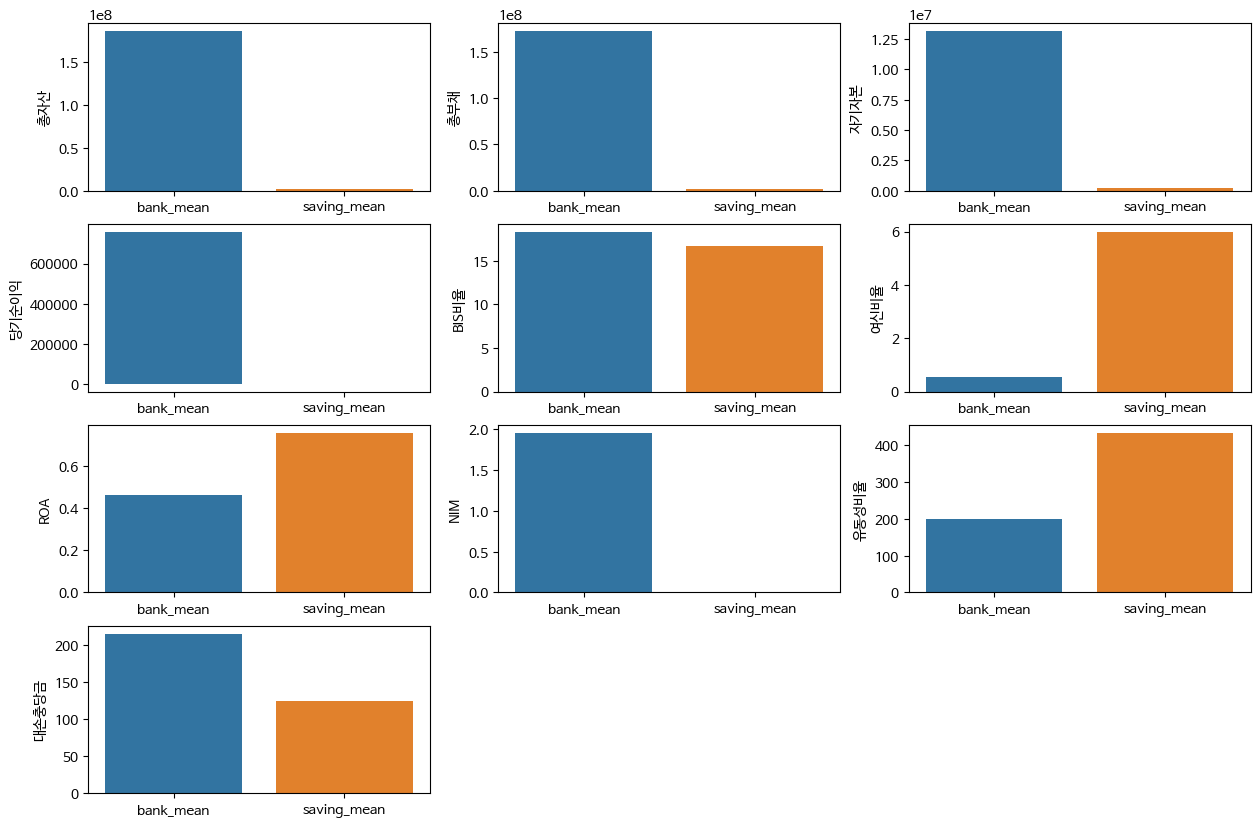

In [ ]:
plt.figure(figsize=(15, 10))

# plt.subplot(4,4,3)
for e,c in enumerate(mean_.columns):
    plt.subplot(4,3,e + 1)
    sns.barplot(data = mean_, x = mean_.index, y= c)


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


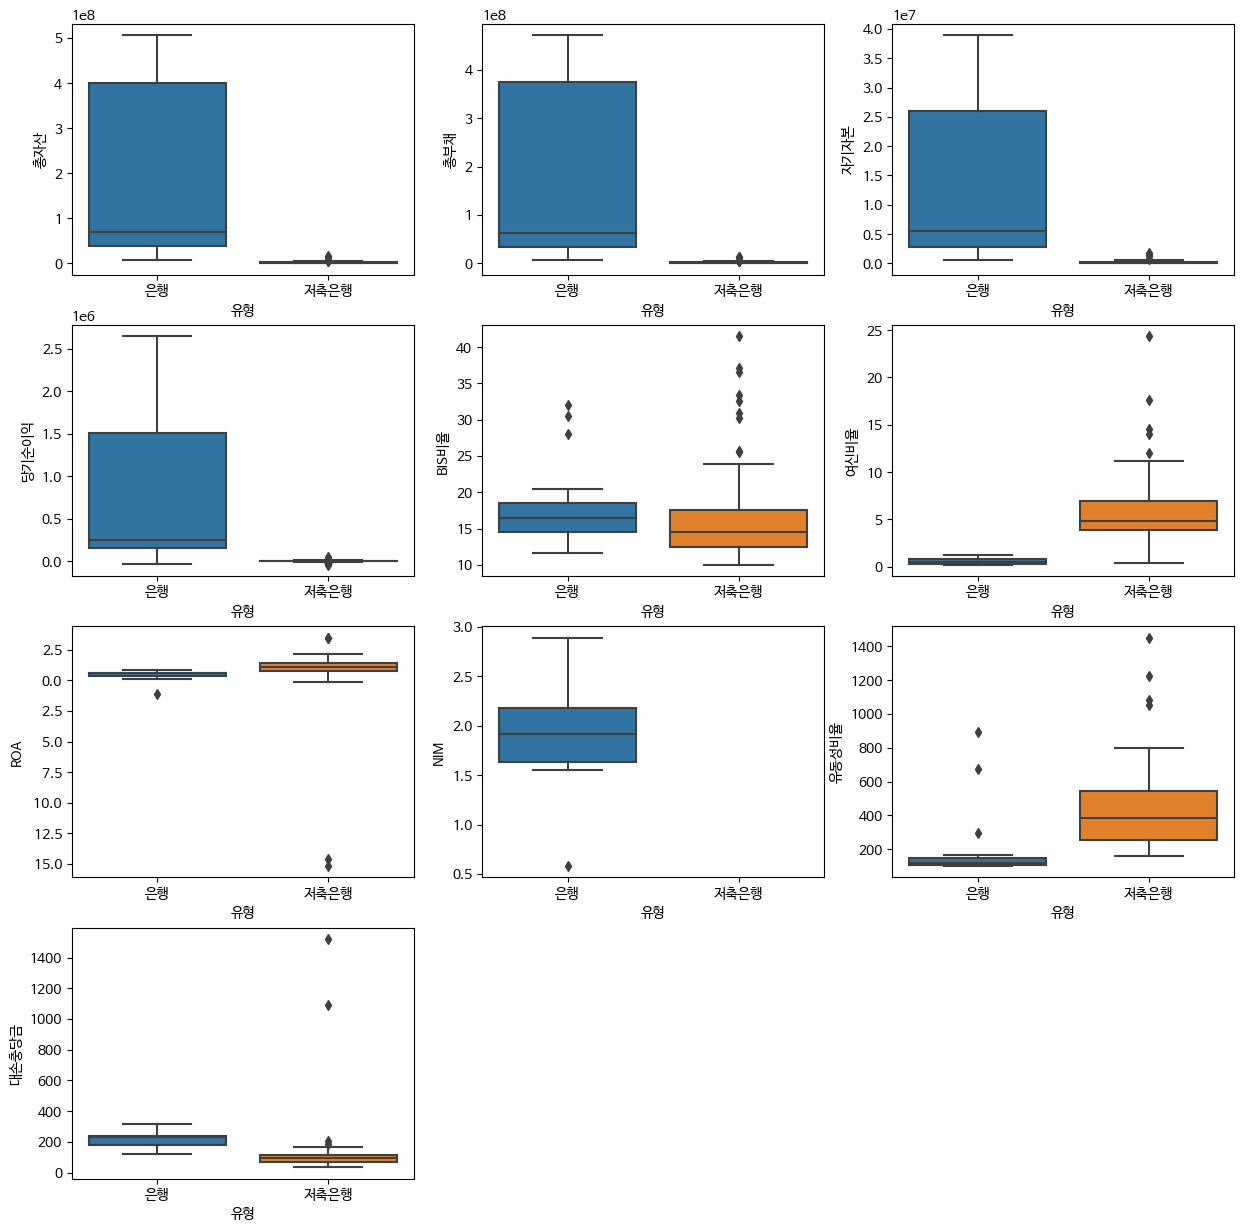

In [ ]:
# boxplot
df_all = pd.concat([df_bank, df_saving_bank])
df_bank_t = df_bank.transpose()
df_bank
plt.figure(figsize=(15, 15))
tmp = df_bank.loc[:,["총자산"]]
tmp

# plt.subplot(4,4,3)
for e,c in enumerate(mean_.columns):
    plt.subplot(4,3,e + 1)
    sns.boxplot(data = df_all, x = "유형", y= df_all.loc[:,c])


## 3) 각 지표들을 모두 통합 후 순위 계산
- 평균 점수 선정이 중요하지 않음 (80점으로 통일)
- NA 값은 평균 값으로 선정


> 3 - 1 저축은행 비율 기준


> 3 - 2 은행 비율 기준



#### 3 - 1 저축은행 비율 기준

- 결과
    - 은행 : 13
    - 저축은행 : 7

In [ ]:
all_grade = df_all[['구분','유형']]

In [ ]:
# 안정성

all_grade = grade_cal(df = df_all,mean_num = 80 , range = 1, col_name = 'BIS비율' , ascending = False, join_df  =  all_grade)
all_grade = grade_cal(df = df_all,mean_num = 80 , range = 1, col_name = '유동성비율' , ascending = False, join_df  =  all_grade)
all_grade = grade_cal(df = df_all,mean_num = 80 , range = 1, col_name = '총자산' , ascending = False, join_df  =  all_grade)
all_grade['안정성'] = all_grade['BIS비율_등급']*0.3 + all_grade['유동성비율_등급']*0.1 + all_grade['총자산_등급']*0.1

In [ ]:
# 건전성
all_grade = grade_cal(df = df_all,mean_num = 80 , range = 1, col_name = '여신비율', ascending = True, join_df  =  all_grade)
all_grade = grade_cal(df = df_all ,mean_num = 80 , range = 1, col_name = '대손충당금' , ascending = False, join_df  =  all_grade)
all_grade = grade_cal(df = df_all ,mean_num = 80 , range = 1, col_name = '자기자본' , ascending = False, join_df  =  all_grade)
all_grade['건전성'] = all_grade['여신비율_등급']*0.05 + all_grade['대손충당금_등급']*0.05 +  all_grade['자기자본_등급']*0.2

In [ ]:
# 저축은행
all_grade = grade_cal(df = df_all,mean_num = 80 , range = 1, col_name = 'ROA', ascending = False, join_df  =  all_grade)
all_grade = grade_cal(df = df_all ,mean_num = 80 , range = 1, col_name = '당기순이익' , ascending = False, join_df  =  all_grade)
all_grade['수익성'] = all_grade['ROA_등급']*0.1 + all_grade['당기순이익_등급']*0.1

In [ ]:
all_grade['총합계'] = all_grade['안정성'] + all_grade['건전성'] + all_grade['수익성']

In [ ]:
tmp = all_grade.sort_values(by = '총합계', ascending = False).reset_index(drop = True).head(20)

In [ ]:
tmp

,구분,유형,BIS비율_등급,유동성비율_등급,총자산_등급,안정성,여신비율_등급,대손충당금_등급,자기자본_등급,건전성,ROA_등급,당기순이익_등급,수익성,총합계
0,주식회사 카카오뱅크,은행,107,116,83,52.0,129,100,87,28.85,79,81,16.0,96.85
1,남양저축은행,저축은행,109,90,39,45.6,114,108,49,20.90,145,75,22.0,88.50
2,국민은행,은행,88,24,94,38.2,136,104,93,30.60,73,93,16.6,85.40
3,한국씨티은행,은행,103,38,81,42.8,122,102,86,28.40,56,84,14.0,85.20
4,하나은행,은행,86,26,93,37.7,138,103,91,30.25,78,92,17.0,84.95
5,농협은행주식회사,은행,90,33,89,39.2,134,106,88,29.60,66,90,15.6,84.40
6,신한은행,은행,87,23,92,37.6,135,96,92,29.95,70,91,16.1,83.65
7,한국스탠다드차타드은행,은행,94,35,87,40.4,133,101,84,28.50,58,85,14.3,83.20
8,우리은행,은행,78,28,91,35.3,137,99,89,29.60,74,89,16.3,81.20
9,부산은행,은행,77,31,86,34.8,132,105,85,28.85,77,86,16.3,79.95


In [ ]:
tmp['유형'].value_counts()

은행      13
저축은행     7
Name: 유형, dtype: int64

#### 3 - 2 은행 비율 기준

- 결과
    - 은행 : 8
    - 저축은행 : 12

In [ ]:
all_grade_bank = df_all[['구분','유형']]

In [ ]:
# 안정성

all_grade_bank = grade_cal(df = df_all,mean_num = 80 , range = 1, col_name = 'BIS비율' , ascending = False, join_df  =  all_grade_bank)
all_grade_bank = grade_cal(df = df_all,mean_num = 80 , range = 1, col_name = '유동성비율' , ascending = False, join_df  =  all_grade_bank)
all_grade_bank['안정성'] = all_grade_bank['BIS비율_등급']*0.3 + all_grade_bank['유동성비율_등급']*0.1

In [ ]:
# 건전성
all_grade_bank = grade_cal(df = df_all,mean_num = 80 , range = 1, col_name = '여신비율', ascending = True, join_df  =  all_grade_bank)
all_grade_bank = grade_cal(df = df_all ,mean_num = 80 , range = 1, col_name = '대손충당금' , ascending = False, join_df  =  all_grade_bank)
all_grade_bank['건전성'] = all_grade_bank['여신비율_등급']*0.1 + all_grade_bank['대손충당금_등급']*0.1

In [ ]:
# 수익성

# NIM 값 NA 존재 => 평균 처리
df_all = df_all.fillna(df_bank['NIM'].mean())
# 계산
all_grade_bank = grade_cal(df = df_all,mean_num = 80 , range = 1, col_name = 'ROA', ascending = False, join_df  =  all_grade_bank)
all_grade_bank = grade_cal(df = df_all ,mean_num = 80 , range = 1, col_name = '당기순이익' , ascending = False, join_df  =  all_grade_bank)
all_grade_bank = grade_cal(df = df_all ,mean_num = 80 , range = 1, col_name = 'NIM' , ascending = False, join_df  =  all_grade_bank)
all_grade_bank['수익성'] = all_grade_bank['ROA_등급']*0.03 + all_grade_bank['당기순이익_등급']*0.04 + all_grade_bank['NIM_등급']*0.03

In [ ]:
all_grade_bank['총합계'] = all_grade_bank['안정성'] + all_grade_bank['건전성'] + all_grade_bank['수익성']

In [ ]:
tmp = all_grade_bank.sort_values(by = '총합계', ascending = False).reset_index(drop = True).head(20)

In [ ]:
tmp

,구분,유형,BIS비율_등급,유동성비율_등급,안정성,여신비율_등급,대손충당금_등급,건전성,ROA_등급,당기순이익_등급,NIM_등급,수익성,총합계
0,주식회사 카카오뱅크,은행,107,116,43.7,129,100,22.9,79,81,86,8.19,74.79
1,남양저축은행,저축은행,109,90,41.7,114,108,22.2,145,75,80,9.75,73.65
2,삼정저축은행,저축은행,96,93,38.1,131,109,24.0,124,63,80,8.64,70.74
3,센트럴저축은행,저축은행,104,111,42.3,116,94,21.0,80,40,80,6.40,69.70
4,부림저축은행,저축은행,111,113,44.6,92,67,15.9,109,65,80,8.27,68.77
5,민국저축은행,저축은행,108,98,42.2,98,76,17.4,117,57,80,8.19,67.79
6,유안타저축은행,저축은행,101,104,40.7,118,89,20.7,71,46,80,6.37,67.77
7,한국씨티은행,은행,103,38,34.7,122,102,22.4,56,84,87,7.65,64.75
8,국제저축은행,저축은행,102,65,37.1,101,95,19.6,135,32,80,7.73,64.43
9,한국스탠다드차타드은행,은행,94,35,31.7,133,101,23.4,58,85,71,7.27,62.37


In [ ]:
tmp['유형'].value_counts()

저축은행    12
은행       8
Name: 유형, dtype: int64

### 총결과

- 저축은행의 지표로 계산하는 값이 더 적절하다고 판단함
- 은행의 지표로 계산하는 것은 저축은행들의 NIM값 처리의 어려움이 있어 적절하지 않다고 판단함

# 계산 종합 결과


## 사용 지표

- 저축은행 평가항목

    - 유동성 비율에서 은행은 유동성커버리지 비율로 사용함
- 평균 및 등급별 점수
    - 평균 : 80점
        - 평균 점수는 중요하지 않음
    - 등급별 점수
        - 1점  
            - 저축은행 기준
            - 데이터들과의 편차를 고려하여 점수에 있어서 너무 큰 차이가 나지 않도록 1점으로 선정

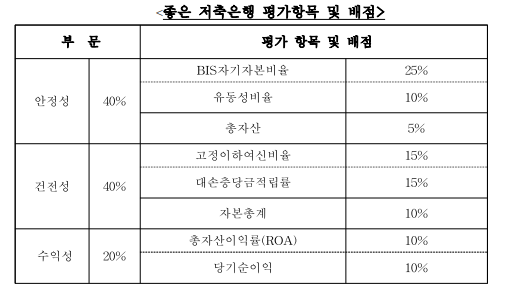

## 데이터



- 사용된 통합 데이터

In [ ]:
df_all

,구분,총자산,총부채,자기자본,당기순이익,BIS비율,여신비율,ROA,NIM,유형,유동성비율,대손충당금
0,경남은행,49459933,45969835,3490097,179759,14.63,0.37,0.60,1.900000,은행,130.71,228.45
1,광주은행,28586391,26404717,2181674,153747,15.69,0.45,0.88,2.890000,은행,106.41,180.26
2,국민은행,506394830,471771786,34623044,2318601,18.45,0.25,0.60,1.820000,은행,101.26,253.86
3,농협은행주식회사,392192577,369969859,22222718,1512360,18.67,0.29,0.46,1.980000,은행,120.42,286.55
4,대구은행,68723045,63714954,5008091,286461,17.65,0.58,0.56,2.040000,은행,116.36,161.31
...,...,...,...,...,...,...,...,...,...,...,...,...
93,하나저축은행,2818231,2481709,336522,-1900,15.19,4.86,0.35,1.956316,저축은행,244.87,101.14
94,한국투자저축은행,8611067,7403931,1207136,3129,16.30,4.35,1.04,1.956316,저축은행,419.72,91.19
95,한성저축은행,397475,332131,65344,-1994,22.12,7.55,1.58,1.956316,저축은행,677.92,101.86
96,한화저축은행,1754102,1579621,174481,4911,13.13,4.78,1.39,1.956316,저축은행,381.90,66.64


- 결과 데이터

In [ ]:
final_data = all_grade.sort_values(by = '총합계', ascending = False).reset_index(drop = True)

In [ ]:
final_data

,구분,유형,BIS비율_등급,유동성비율_등급,총자산_등급,안정성,여신비율_등급,대손충당금_등급,자기자본_등급,건전성,ROA_등급,당기순이익_등급,수익성,총합계
0,주식회사 카카오뱅크,은행,107,116,83,52.0,129,100,87,28.85,79,81,16.0,96.85
1,남양저축은행,저축은행,109,90,39,45.6,114,108,49,20.90,145,75,22.0,88.50
2,국민은행,은행,88,24,94,38.2,136,104,93,30.60,73,93,16.6,85.40
3,한국씨티은행,은행,103,38,81,42.8,122,102,86,28.40,56,84,14.0,85.20
4,하나은행,은행,86,26,93,37.7,138,103,91,30.25,78,92,17.0,84.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,영진저축은행,저축은행,35,107,11,22.3,53,25,3,4.50,75,20,9.5,36.30
94,동양저축은행,저축은행,20,74,35,16.9,68,19,25,9.35,81,14,9.5,35.75
95,라온저축은행,저축은행,41,53,2,17.8,49,17,-1,3.10,84,18,10.2,31.10
96,대원상호저축은행,저축은행,18,80,-3,13.1,43,71,-3,5.10,49,27,7.6,25.80


- 등급 선정

    - 5개의 등급으로 분류

In [ ]:
labels=[1,2,3,4,5]

final_data['등급'] = pd.qcut(range(len(final_data.index)), q=5, labels = labels)


In [ ]:
final_data

,구분,유형,BIS비율_등급,유동성비율_등급,총자산_등급,안정성,여신비율_등급,대손충당금_등급,자기자본_등급,건전성,ROA_등급,당기순이익_등급,수익성,총합계,등급
0,주식회사 카카오뱅크,은행,107,116,83,52.0,129,100,87,28.85,79,81,16.0,96.85,1
1,남양저축은행,저축은행,109,90,39,45.6,114,108,49,20.90,145,75,22.0,88.50,1
2,국민은행,은행,88,24,94,38.2,136,104,93,30.60,73,93,16.6,85.40,1
3,한국씨티은행,은행,103,38,81,42.8,122,102,86,28.40,56,84,14.0,85.20,1
4,하나은행,은행,86,26,93,37.7,138,103,91,30.25,78,92,17.0,84.95,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,영진저축은행,저축은행,35,107,11,22.3,53,25,3,4.50,75,20,9.5,36.30,5
94,동양저축은행,저축은행,20,74,35,16.9,68,19,25,9.35,81,14,9.5,35.75,5
95,라온저축은행,저축은행,41,53,2,17.8,49,17,-1,3.10,84,18,10.2,31.10,5
96,대원상호저축은행,저축은행,18,80,-3,13.1,43,71,-3,5.10,49,27,7.6,25.80,5


In [ ]:
# 데이터 저장
final_data.to_csv("./bank_grade.csv", encoding = "cp949")